<a href="https://colab.research.google.com/github/magiwanders/CMLS_HW1/blob/master/STMAE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
from pathlib import Path
import sklearn

plt.style.use('seaborn')

In [ ]:
!apt-get install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
!svn checkout https://github.com/stevetjoa/musicinformationretrieval.com/trunk/audio

Checked out revision 394.


# Non-Negative Matrix Factorization (NMF)

In [ ]:
x, sr = librosa.load('audio/conga_groove.wav')
print('Sample rate: ', sr)

Sample rate:  22050


In [ ]:
ipd.Audio(x, rate = sr)


In [ ]:
S = librosa.stft(x)

X, X_phase = librosa.magphase(S)

In [ ]:
n_components = 6
W, H = librosa.decompose.decompose(X, n_components=n_components)
print(W.shape, H.shape, X.shape)

(1025, 6) (6, 188) (1025, 188)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


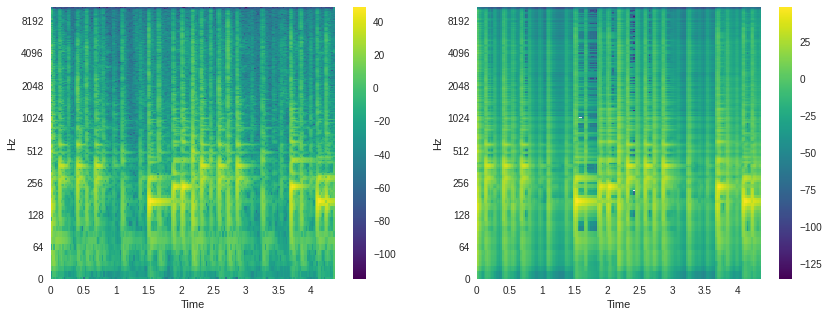

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
librosa.display.specshow(20*np.log10(X), sr=sr, x_axis = 'time', y_axis='log', cmap='viridis');
plt.colorbar();
plt.subplot(1,2,2)
librosa.display.specshow(20*np.log10(np.dot(W,H)), sr=sr, x_axis = 'time', y_axis='log', cmap='viridis');
plt.colorbar();

In [ ]:
plt.figure(figsize=(15,6))
for i in range(n_components):
  plt.subplot(2,3,i+1);
  plt.plot(20*np.log10(W[:,i]+np.finfo(float).eps))
  plt.ylim(bottom = -60)
  plt.xlabel('Frequency [Hz]')
  plt.title('Basis Component {}' .format(i))
  plt.subplots_adjust(hspace=0.5)
  plt.subplots_adjust(wspace = 0.5)

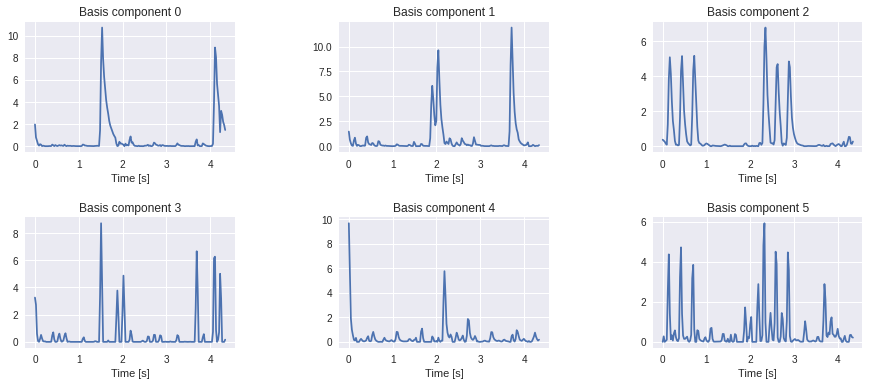

In [ ]:
t_frames = librosa.frames_to_time(np.arange(H.shape[1]))

plt.figure(figsize=(15,6))
for i in range(n_components):
  plt.subplot(2,3,i+1)
  plt.plot(t_frames, H[i,:])
  plt.xlabel('Time [s]')
  plt.title('Basis component {}' .format(i))
  plt.subplots_adjust(hspace=0.5)
  plt.subplots_adjust(wspace = 0.5)

In [ ]:
reconstructed_signals = []
for i in range(n_components):
  #reconstruc the magnitude
  new_component = np.dot(np.expand_dims(W[:,i], axis = 1), np.expand_dims(H[i,:], axis = 0))

  #add phase
  new_component = new_component*np.exp(1j*X_phase)
  reconstructed_signals.append(librosa.core.istft(new_component))
  

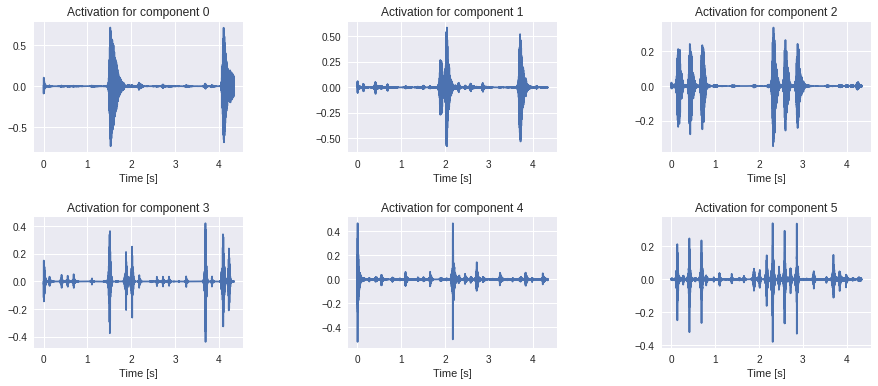

In [ ]:
t_rec = (1.0/sr) * np.arange(reconstructed_signals[0].shape[0])

plt.figure(figsize=(15,6))
for i in range(n_components):
  plt.subplot(2,3,i+1)
  plt.plot(t_rec, reconstructed_signals[i])
  plt.xlabel('Time [s]')
  plt.title('Activation for component {}' .format(i))
  plt.subplots_adjust(hspace=0.5)
  plt.subplots_adjust(wspace = 0.5)

In [ ]:
ipd.Audio(reconstructed_signals[0], rate = sr)

In [ ]:
ipd.Audio(reconstructed_signals[1], rate = sr)

In [ ]:
ipd.Audio(reconstructed_signals[2], rate = sr)

In [ ]:
ipd.Audio(reconstructed_signals[3], rate = sr)

In [ ]:
ipd.Audio(reconstructed_signals[4], rate = sr)

In [ ]:
ipd.Audio(reconstructed_signals[5], rate = sr)

In [ ]:
mix = sum(reconstructed_signals)
ipd.Audio(mix, rate =sr)

# Harmonic-Percussion Separation

In [ ]:
xh, sr_h = librosa.load('audio/prelude_cmaj.wav', duration =7, sr = None)
ipd.Audio(xh, rate = sr_h)

In [ ]:
xp, sr_p = librosa.load('audio/125_bounce.wav', duration =7, sr = None)
ipd.Audio(xp, rate = sr_p)

In [ ]:
x = xh/xh.max() + xp/xp.max()
x = 0.5 *x/x.max()

ipd.Audio(x, rate = sr_h)

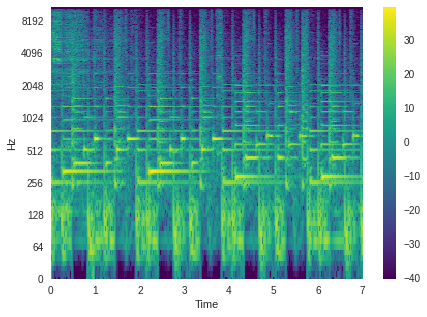

In [ ]:
S = librosa.stft(x)
X, X_phase = librosa.magphase(S)
Xmag = librosa.amplitude_to_db(X)
plt.figure(figsize=(7,5))
librosa.display.specshow(Xmag, sr=sr_h, x_axis = 'time', y_axis='log', cmap='viridis');
plt.colorbar();

In [ ]:
#Separation 
Hm, Prs = librosa.decompose.hpss(X)

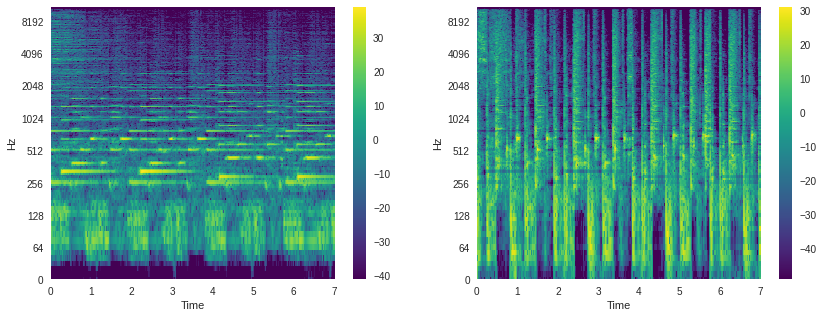

In [ ]:
Hmag = librosa.amplitude_to_db(Hm)
Pmag = librosa.amplitude_to_db(Prs)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
librosa.display.specshow(Hmag, sr=sr_h, x_axis = 'time', y_axis='log', cmap='viridis');
plt.colorbar();
plt.subplot(1,2,2)
librosa.display.specshow(Pmag, sr=sr_p, x_axis = 'time', y_axis='log', cmap='viridis');
plt.colorbar();

#Hm made of horizontal line 
# Prs of vertical
# it is due to the algorithm

In [ ]:
h = librosa.istft(Hm)
ipd.Audio(h, rate= sr_h)

In [ ]:
p = librosa.istft(Prs)
ipd.Audio(p, rate= sr_p)

# Feature Extraction 

In [ ]:
kicklist = [str(file) for file in Path().glob('audio/drum_samples/train/kick_*.mp3')] #starting from kick mp3 file
snarelist = [str(file) for file in Path().glob('audio/drum_samples/train/snare_*.mp3')] 
kicklist, snarelist


(['audio/drum_samples/train/kick_05.mp3',
  'audio/drum_samples/train/kick_03.mp3',
  'audio/drum_samples/train/kick_02.mp3',
  'audio/drum_samples/train/kick_09.mp3',
  'audio/drum_samples/train/kick_08.mp3',
  'audio/drum_samples/train/kick_01.mp3',
  'audio/drum_samples/train/kick_10.mp3',
  'audio/drum_samples/train/kick_07.mp3',
  'audio/drum_samples/train/kick_06.mp3',
  'audio/drum_samples/train/kick_04.mp3'],
 ['audio/drum_samples/train/snare_04.mp3',
  'audio/drum_samples/train/snare_03.mp3',
  'audio/drum_samples/train/snare_07.mp3',
  'audio/drum_samples/train/snare_05.mp3',
  'audio/drum_samples/train/snare_10.mp3',
  'audio/drum_samples/train/snare_02.mp3',
  'audio/drum_samples/train/snare_06.mp3',
  'audio/drum_samples/train/snare_08.mp3',
  'audio/drum_samples/train/snare_09.mp3',
  'audio/drum_samples/train/snare_01.mp3'])

In [ ]:
kick_signals = list(librosa.load(p)[0] for p in kicklist)
snare_signals = list(librosa.load(p)[0] for p in snarelist) 

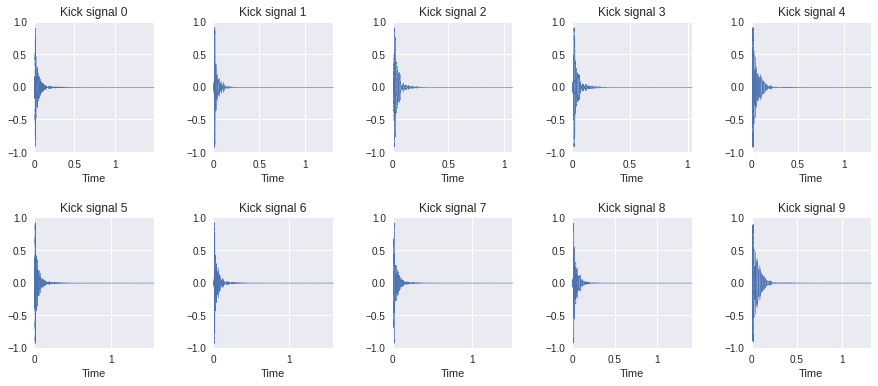

In [ ]:
# Display drum signals
plt.figure(figsize=(15, 6))
for i, x in enumerate(kick_signals):
  plt.subplot(2,5,i+1)
  librosa.display.waveplot(x[:100000])
  plt.ylim(-1,1)
  plt.subplots_adjust(hspace = 0.5)
  plt.subplots_adjust(wspace = 0.5)
  plt.title('Kick signal {}' .format(i))


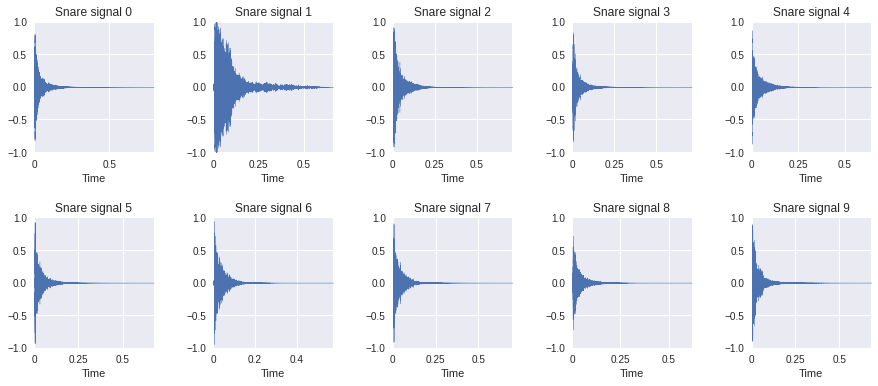

In [ ]:
# Display drum signals
plt.figure(figsize=(15, 6))
for i, x in enumerate(snare_signals):
  plt.subplot(2,5,i+1)
  librosa.display.waveplot(x[:100000])
  plt.ylim(-1,1)
  plt.subplots_adjust(hspace = 0.5)
  plt.subplots_adjust(wspace = 0.5)
  plt.title('Snare signal {}' .format(i))


In [ ]:
def extract_features ( signal ):
  return [
          np.mean(librosa.feature.zero_crossing_rate(signal)[0,:]),
          np.std(librosa.feature.spectral_centroid(signal)[0,:]),
  ]

In [ ]:
kick_features = np.array([extract_features(x) for x in kick_signals])
snare_features = np.array([extract_features(x) for x in snare_signals])

print(kick_features.shape)  #10 kick examples two feature for each one
print(snare_features.shape)

(10, 2)
(10, 2)


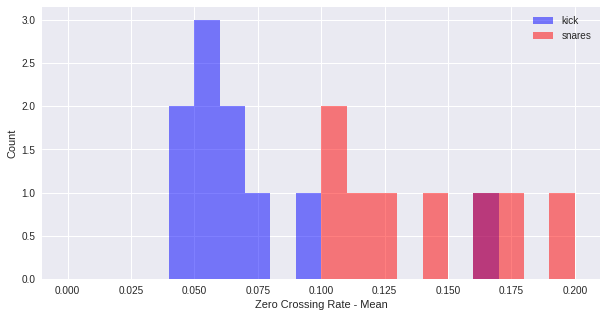

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(kick_features[:,0], color='b', range =(0,0.2), alpha=0.5, bins = 20);
plt.hist(snare_features[:,0], color='r', range =(0,0.2), alpha=0.5, bins = 20);
plt.legend(('kick', 'snares'))
plt.xlabel('Zero Crossing Rate - Mean')
plt.ylabel('Count');

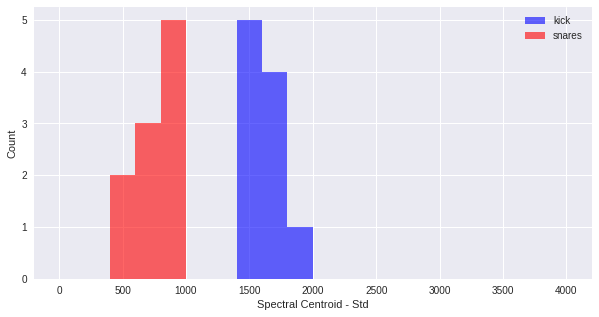

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(kick_features[:,1], color='b', range =(0,4000), alpha=0.6, bins = 20);
plt.hist(snare_features[:,1], color='r', range =(0,4000), alpha=0.6, bins = 20);
plt.legend(('kick', 'snares'))
plt.xlabel('Spectral Centroid - Std')
plt.ylabel('Count');

In [ ]:
feature_table = np.vstack((kick_features, snare_features))
print(feature_table.shape)

(20, 2)


In [ ]:
files_table = kicklist + snarelist
files_table 

['audio/drum_samples/train/kick_05.mp3',
 'audio/drum_samples/train/kick_03.mp3',
 'audio/drum_samples/train/kick_02.mp3',
 'audio/drum_samples/train/kick_09.mp3',
 'audio/drum_samples/train/kick_08.mp3',
 'audio/drum_samples/train/kick_01.mp3',
 'audio/drum_samples/train/kick_10.mp3',
 'audio/drum_samples/train/kick_07.mp3',
 'audio/drum_samples/train/kick_06.mp3',
 'audio/drum_samples/train/kick_04.mp3',
 'audio/drum_samples/train/snare_04.mp3',
 'audio/drum_samples/train/snare_03.mp3',
 'audio/drum_samples/train/snare_07.mp3',
 'audio/drum_samples/train/snare_05.mp3',
 'audio/drum_samples/train/snare_10.mp3',
 'audio/drum_samples/train/snare_02.mp3',
 'audio/drum_samples/train/snare_06.mp3',
 'audio/drum_samples/train/snare_08.mp3',
 'audio/drum_samples/train/snare_09.mp3',
 'audio/drum_samples/train/snare_01.mp3']

In [ ]:
labels_gt = np.hstack([np.ones((10,)), np.zeros((10,))])
labels_gt

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))

In [ ]:
training_features = scaler.fit_transform(feature_table)
training_features

#scaling the features

array([[-0.8462879 ,  0.61652839],
       [-0.40696638,  0.84655473],
       [-0.81034367,  0.53403154],
       [-0.78350737,  0.46686203],
       [-0.96219885,  0.56107059],
       [-0.71544163,  0.81844171],
       [-0.95579932,  0.71742072],
       [-0.8972157 ,  0.66230319],
       [ 0.42633854,  1.        ],
       [-1.        ,  0.52125086],
       [-0.29841117, -0.60491181],
       [-0.32115437, -0.47060581],
       [ 0.89150477, -1.        ],
       [-0.21982709, -0.38441966],
       [ 0.75625585, -0.7146025 ],
       [-0.07925561, -0.36074543],
       [ 1.        , -0.72657612],
       [ 0.18095332, -0.56009903],
       [ 0.41531938, -0.42630647],
       [ 0.53796255, -0.97516936]])

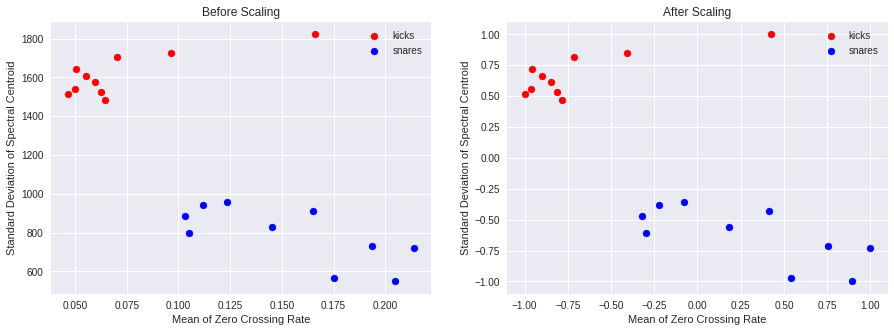

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(feature_table[labels_gt==1,0], feature_table[labels_gt==1,1], c = 'r')
plt.scatter(feature_table[labels_gt==0,0], feature_table[labels_gt==0,1], c = 'b');
plt.xlabel('Mean of Zero Crossing Rate');
plt.ylabel('Standard Deviation of Spectral Centroid');
plt.legend(('kicks', 'snares'))
plt.title('Before Scaling');

plt.subplot(1,2,2)
plt.scatter(training_features[labels_gt==1,0], training_features[labels_gt==1,1], c = 'r')
plt.scatter(training_features[labels_gt==0,0], training_features[labels_gt==0,1], c = 'b');
plt.xlabel('Mean of Zero Crossing Rate');
plt.ylabel('Standard Deviation of Spectral Centroid');
plt.legend(('kicks', 'snares'))
plt.title('After Scaling');

#almost identical apart from the scaling

In [ ]:
def extract_features ( signal ):
  return [
          np.std(librosa.feature.zero_crossing_rate(signal)[0,:]),
          np.max(librosa.feature.spectral_centroid(signal)[0,:]),
  ]

In [ ]:
kick_features = np.array([extract_features(x) for x in kick_signals])
snare_features = np.array([extract_features(x) for x in snare_signals])

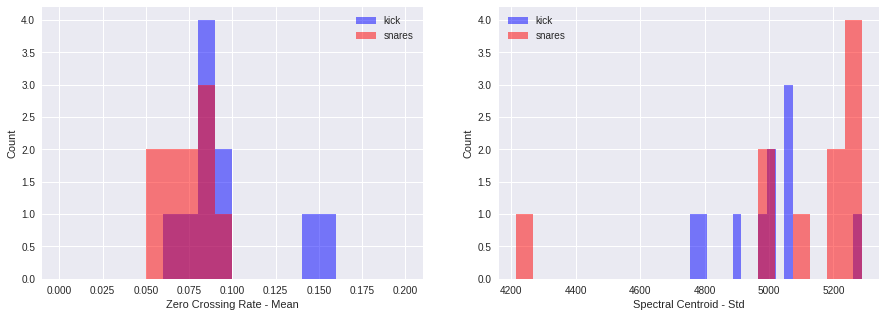

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(kick_features[:,0], color='b', range =(0,0.2), alpha=0.5, bins = 20);
plt.hist(snare_features[:,0], color='r', range =(0,0.2), alpha=0.5, bins = 20);
plt.legend(('kick', 'snares'))
plt.xlabel('Zero Crossing Rate - Mean')
plt.ylabel('Count');

# not good for discriminating

plt.subplot(1,2,2)
plt.hist(kick_features[:,1], color='b', alpha=0.5, bins = 20);
plt.hist(snare_features[:,1], color='r', alpha=0.5, bins = 20);
plt.legend(('kick', 'snares'))
plt.xlabel('Spectral Centroid - Std')
plt.ylabel('Count');

# here we 

In [ ]:
feature_table = np.vstack((kick_features, snare_features))

In [ ]:
training_features = scaler.fit_transform(feature_table)

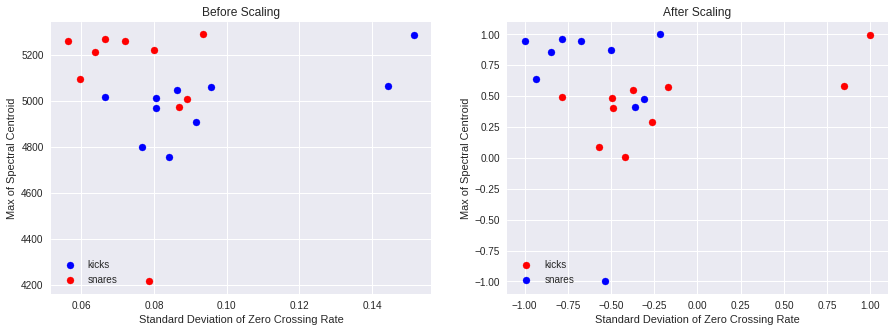

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(feature_table[labels_gt==1,0], feature_table[labels_gt==1,1], c = 'b')
plt.scatter(feature_table[labels_gt==0,0], feature_table[labels_gt==0,1], c = 'r');
plt.xlabel('Standard Deviation of Zero Crossing Rate');
plt.ylabel('Max of Spectral Centroid');
plt.legend(('kicks', 'snares'))
plt.title('Before Scaling');

plt.subplot(1,2,2)
plt.scatter(training_features[labels_gt==1,0], training_features[labels_gt==1,1], c = 'r')
plt.scatter(training_features[labels_gt==0,0], training_features[labels_gt==0,1], c = 'b');
plt.xlabel('Standard Deviation of Zero Crossing Rate');
plt.ylabel('Max of Spectral Centroid');
plt.legend(('kicks', 'snares'))
plt.title('After Scaling');


# Principal Component Analysis

In [ ]:
def extract_features ( signal ):
  return [
          np.mean(librosa.feature.zero_crossing_rate(signal)[0,:]),
          np.std(librosa.feature.spectral_centroid(signal)[0,:]),
          np.mean(librosa.feature.spectral_flatness(signal)[0,:]),
  ]

In [ ]:
# Perform feature extraction
kick_features = np.array([extract_features(x) for x in kick_signals])
snare_features = np.array([extract_features(x) for x in snare_signals])

In [ ]:
# Group features
feature_table = np.vstack((kick_features, snare_features))
feature_table

array([[5.94329834e-02, 1.57727764e+03, 3.21093202e-02],
       [9.61571409e-02, 1.72372002e+03, 5.87048940e-02],
       [6.24376662e-02, 1.52475741e+03, 2.89208982e-02],
       [6.46809896e-02, 1.48199508e+03, 2.89445985e-02],
       [4.97436523e-02, 1.54197136e+03, 2.17404552e-02],
       [7.03708022e-02, 1.70582234e+03, 3.87746803e-02],
       [5.02786075e-02, 1.64150903e+03, 2.54724100e-02],
       [5.51757812e-02, 1.60641939e+03, 2.85221431e-02],
       [1.65815510e-01, 1.82140836e+03, 1.01161495e-01],
       [4.65837445e-02, 1.51662080e+03, 1.84529889e-02],
       [1.05231585e-01, 7.99668366e+02, 4.22872677e-02],
       [1.03330415e-01, 8.85172010e+02, 4.44073193e-02],
       [2.04700101e-01, 5.48142145e+02, 1.13041930e-01],
       [1.11800655e-01, 9.40040967e+02, 4.12943289e-02],
       [1.93394252e-01, 7.29835641e+02, 1.10770538e-01],
       [1.23551432e-01, 9.55112767e+02, 4.79713045e-02],
       [2.13769531e-01, 7.22212839e+02, 1.24681748e-01],
       [1.45303049e-01, 8.28197

In [ ]:
training_features = scaler.fit_transform(feature_table)
training_features

array([[-0.8462879 ,  0.61652839, -0.74288825],
       [-0.40696638,  0.84655473, -0.24216558],
       [-0.81034367,  0.53403154, -0.8029176 ],
       [-0.78350737,  0.46686203, -0.80247139],
       [-0.96219885,  0.56107059, -0.93810591],
       [-0.71544163,  0.81844171, -0.61739756],
       [-0.95579932,  0.71742072, -0.8678433 ],
       [-0.8972157 ,  0.66230319, -0.81042508],
       [ 0.42633854,  1.        ,  0.55717729],
       [-1.        ,  0.52125086, -1.        ],
       [-0.29841117, -0.60491181, -0.55126505],
       [-0.32115437, -0.47060581, -0.51135021],
       [ 0.89150477, -1.        ,  0.78085372],
       [-0.21982709, -0.38441966, -0.5699594 ],
       [ 0.75625585, -0.7146025 ,  0.73808957],
       [-0.07925561, -0.36074543, -0.44425002],
       [ 1.        , -0.72657612,  1.        ],
       [ 0.18095332, -0.56009903, -0.19352113],
       [ 0.41531938, -0.42630647,  0.23895221],
       [ 0.53796255, -0.97516936,  0.66422212]])

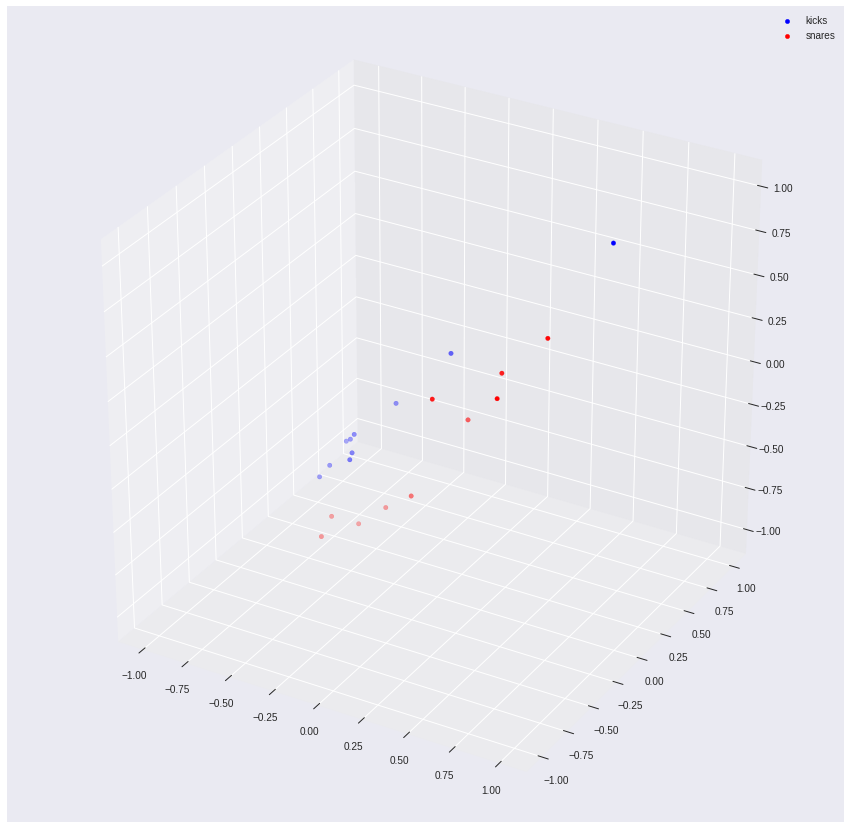

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(training_features[labels_gt==1,0],training_features[labels_gt==1,1], training_features[labels_gt==1,2],c='b')
ax.scatter(training_features[labels_gt==0,0],training_features[labels_gt==0,1], training_features[labels_gt==0,2],c='r')
ax.legend(('kicks', 'snares'))

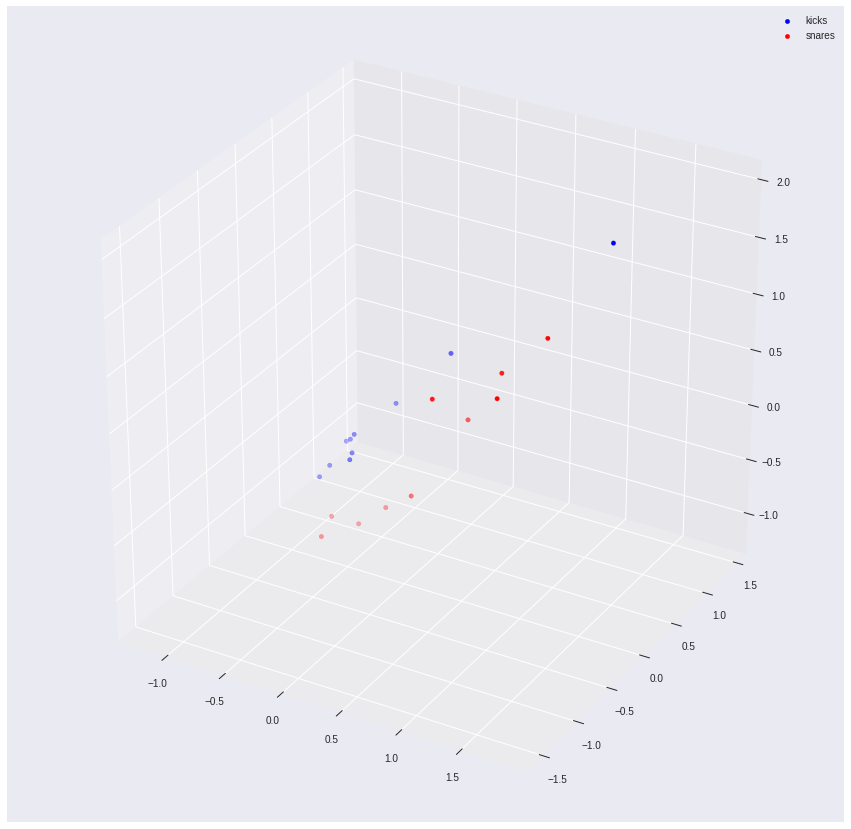

In [ ]:
X = sklearn.preprocessing.scale(feature_table, axis= 0)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[labels_gt==1,0],X[labels_gt==1,1], X[labels_gt==1,2],c='b')
ax.scatter(X[labels_gt==0,0],X[labels_gt==0,1], X[labels_gt==0,2],c='r')
ax.legend(('kicks', 'snares'))

In [ ]:
X.mean()

-1.2212453270876723e-16

In [ ]:
X.std()

1.0

In [ ]:
n_comp = 2
model = sklearn.decomposition.PCA(n_components=n_comp, whiten = True)

In [ ]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [ ]:
Y = model.transform(X)
print(Y.shape)

(20, 2)


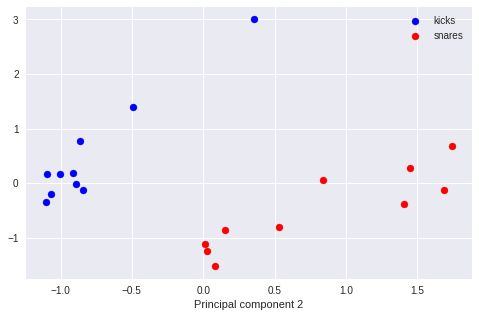

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.xlabel('Principal component 1');
plt.ylabel('Principal component 2');
plt.legend(('kicks', 'snares'));

In [ ]:
np.dot(Y.T, Y) # same variances

array([[1.90000000e+01, 9.41316789e-15],
       [9.41316789e-15, 1.90000000e+01]])

In [ ]:
normal_vector = np.cross(model.components_[0], model.components_[1])

In [ ]:
Xp = np.arange(-1.5, 1.5, 0.25)
Yp = np.arange(-1.5, 1.5, 0.25)
Xp, Yp = np.meshgrid(Xp, Yp)

Z = - (normal_vector[0]/normal_vector[2])*Xp - (normal_vector[1]/normal_vector[2])*Yp



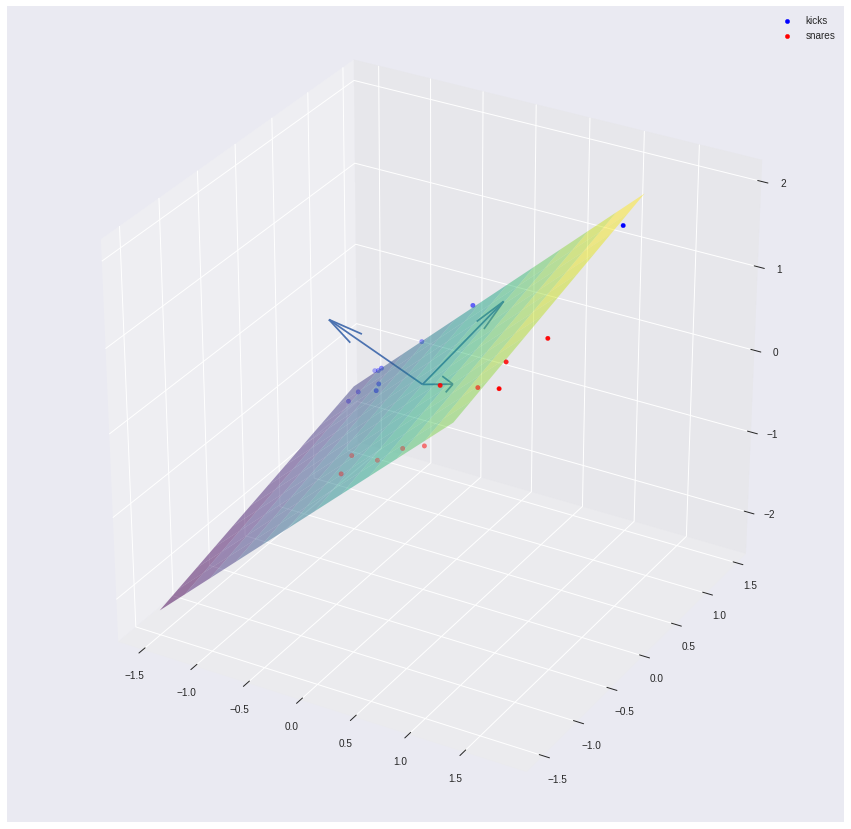

In [ ]:
fig = plt.figure(figsize =(15,15))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[labels_gt==1,0],X[labels_gt==1,1], X[labels_gt==1,2],c='b')
ax.scatter(X[labels_gt==0,0],X[labels_gt==0,1], X[labels_gt==0,2],c='r')
ax.legend(('kicks', 'snares'));

ax.plot_surface(Xp, Yp, Z, cmap='viridis', alpha=0.5, linewidth=0)

ax.quiver(0,0,0, model.components_[0][0], model.components_[0][1], model.components_[0][2])
ax.quiver(0,0,0, model.components_[1][0], model.components_[1][1], model.components_[1][2])
ax.quiver(0,0,0, normal_vector[0], normal_vector[1], normal_vector[2])


In [ ]:
# projecting on a single component
model = sklearn.decomposition.PCA(n_components=1, whiten = True)
model.fit(X)
Y_1D = model.transform(X)
print(Y_1D.shape)

(20, 1)


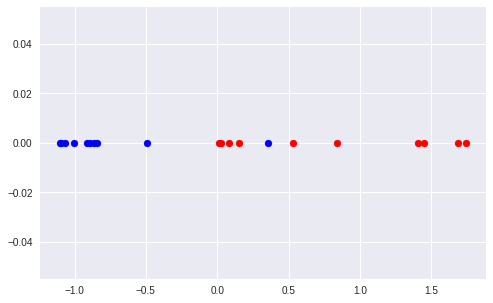

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(Y_1D[labels_gt==1,0], np.zeros((10,1)), c = 'b')
plt.scatter(Y_1D[labels_gt == 0,0], np.zeros((10,1)), c = 'r' )

# k-Nearest Neighbors

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))
X_train = scaler.fit_transform(feature_table)
X_train.shape

(20, 2)

In [ ]:
k_param = 5
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k_param )
model.fit(X_train, labels_gt)
labels = model.predict(X_train)
print(labels)

#perfect classification with k = 1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.]


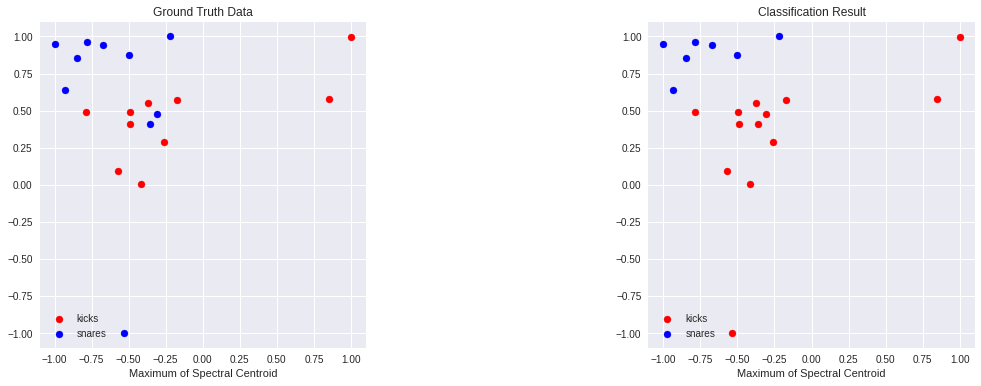

In [ ]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
plt.scatter(X_train[labels_gt==1,0], X_train[labels_gt==1,1], c = 'r')
plt.scatter(X_train[labels_gt==0,0], X_train[labels_gt==0,1], c = 'b')

plt.title('Ground Truth Data')
plt.xlabel('Mean of Zero Crossing Rate')
plt.xlabel('Maximum of Spectral Centroid')
plt.legend(('kicks', 'snares'))
ax1.set_aspect('equal')

ax2 = plt.subplot(1,2,2)
plt.scatter(X_train[labels==1,0], X_train[labels==1,1], c = 'r')
plt.scatter(X_train[labels==0,0], X_train[labels==0,1], c = 'b')
ax2.set_aspect('equal')

plt.title('Classification Result')
plt.xlabel('Mean of Zero Crossing Rate')
plt.xlabel('Maximum of Spectral Centroid')
plt.legend(('kicks', 'snares'))

# **Support Vector Machines**


In [ ]:
penalty = 10
model = sklearn.svm.SVC(kernel='linear', C = penalty)
model.fit(X_train, labels_gt)
labels = model.predict(X_train)
print(labels)

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.]


In [ ]:
def draw_classplane(ax, w, xrange):
  a = -w[0] / w[1]
  xx = np.linspace(-1,1)
  yy = a*xx - (model.intercept_[0]) / w[1]
  margin = 1/np.sqrt(np.sum(model.coef_**2))
  yy_down = yy - np.sqrt(1 + a**2)*margin
  yy_up = yy + np.sqrt(1 + a**2)*margin
  ax.plot(xx, yy, 'k-')
  ax.plot(xx, yy_down, 'k--')
  ax.plot(xx, yy_up, 'k--')


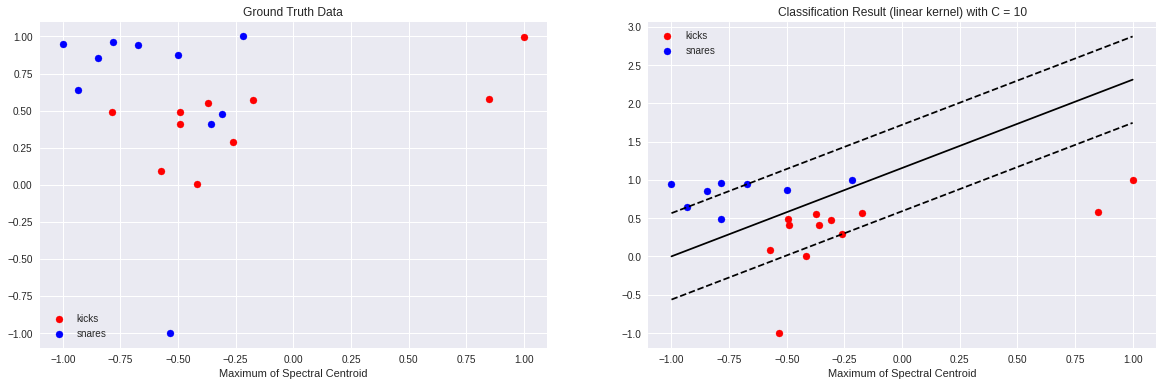

In [ ]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
plt.scatter(X_train[labels_gt==1,0], X_train[labels_gt==1,1], c = 'r')
plt.scatter(X_train[labels_gt==0,0], X_train[labels_gt==0,1], c = 'b')

plt.title('Ground Truth Data')
plt.xlabel('Mean of Zero Crossing Rate')
plt.xlabel('Maximum of Spectral Centroid')
plt.legend(('kicks', 'snares'))

ax2 = plt.subplot(1,2,2)
plt.scatter(X_train[labels==1,0], X_train[labels==1,1], c = 'r')
plt.scatter(X_train[labels==0,0], X_train[labels==0,1], c = 'b')

plt.title('Classification Result (linear kernel) with C = {}' .format(penalty))
plt.xlabel('Mean of Zero Crossing Rate')
plt.xlabel('Maximum of Spectral Centroid')
plt.legend(('kicks', 'snares'))

# Draw pplane
draw_classplane(plt.gca(), model.coef_[0], (-1,1))

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(labels_gt, labels)
print('Accuracy: ', acc)

Accuracy:  0.8


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = ['Snare', 'Kicks']
cm = confusion_matrix(labels_gt, labels)
print(cm)

[[7 3]
 [1 9]]


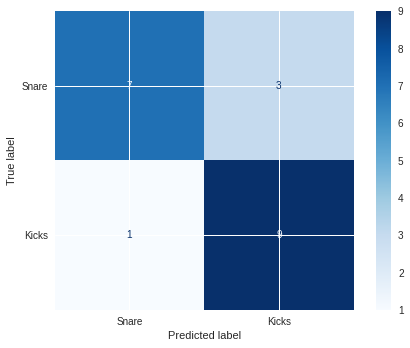

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= class_names)

disp.plot(cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels_gt, labels, target_names = class_names))

              precision    recall  f1-score   support

       Snare       0.88      0.70      0.78        10
       Kicks       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



In [ ]:
penalty = 1
model = sklearn.svm.SVC(kernel='rbf', C = penalty) #radial basis function
model.fit(X_train, labels_gt)
labels = model.predict(X_train)
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


Accuracy:  0.9


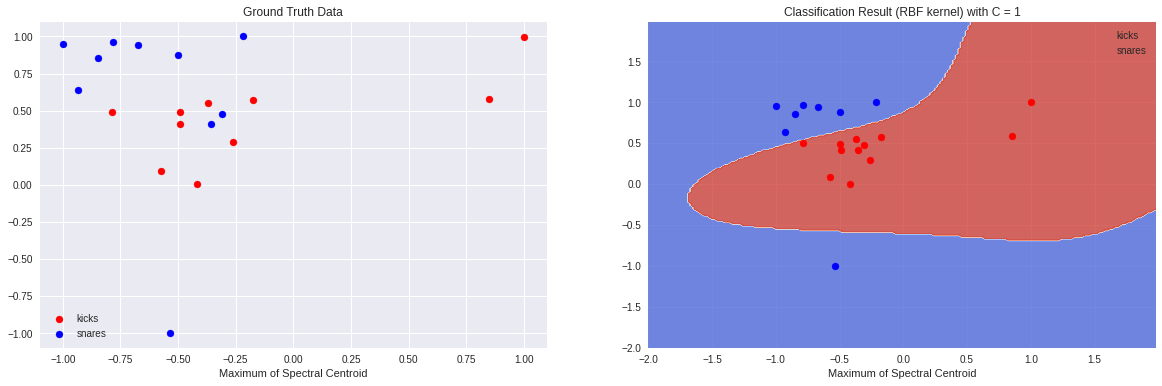

In [ ]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
plt.scatter(X_train[labels_gt==1,0], X_train[labels_gt==1,1], c = 'r')
plt.scatter(X_train[labels_gt==0,0], X_train[labels_gt==0,1], c = 'b')

plt.title('Ground Truth Data')
plt.xlabel('Mean of Zero Crossing Rate')
plt.xlabel('Maximum of Spectral Centroid')
plt.legend(('kicks', 'snares'))

ax2 = plt.subplot(1,2,2)
h = 0.02
x_min, x_max = X_train[:,0].min() -1, X_train[:,0].max(0) +1 
y_min, y_max = X_train[:,0].min() -1, X_train[:,0].max(0) +1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap = plt.cm.coolwarm, alpha=0.8)

plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());

plt.scatter(X_train[labels==1,0], X_train[labels==1,1], c = 'r')
plt.scatter(X_train[labels==0,0], X_train[labels==0,1], c = 'b')

plt.title('Classification Result (RBF kernel) with C = {}' .format(penalty))
plt.xlabel('Mean of Zero Crossing Rate')
plt.xlabel('Maximum of Spectral Centroid')
plt.legend(('kicks', 'snares'))

acc = accuracy_score(labels_gt, labels)
print('Accuracy: ', acc)

##**k-Means Clustering**

In [ ]:
Xdata = Y
model = sklearn.cluster.KMeans(n_clusters=2)

In [ ]:
labels = model.fit_predict(Y)
print(labels)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


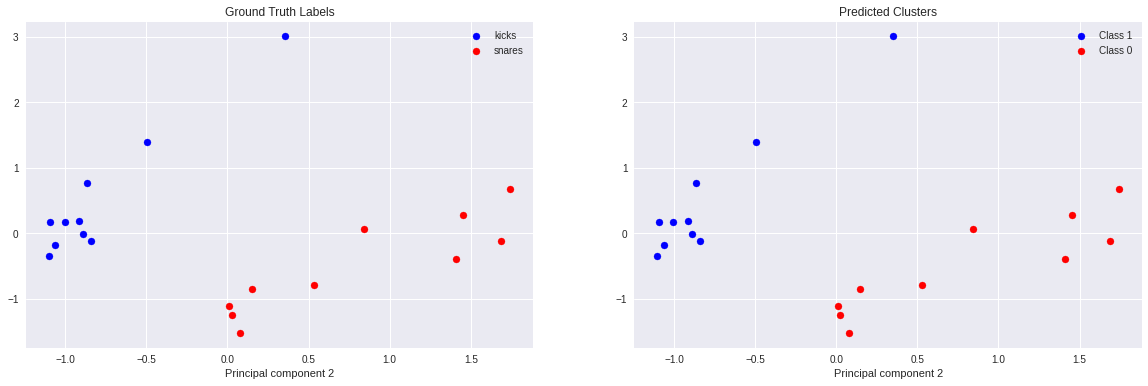

In [ ]:
labels = model.fit_predict(Y)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.title('Ground Truth Labels')
plt.xlabel('Principal component 1');
plt.xlabel('Principal component 2');
plt.legend(('kicks', 'snares'));

plt.subplot(1,2,2)
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.title('Predicted Clusters')
plt.xlabel('Principal component 1');
plt.xlabel('Principal component 2');
plt.legend(('Class 1', 'Class 0'));



In [ ]:
labels = model.fit_predict(Y)

acc = accuracy_score(labels_gt, labels)
print(acc)

#to make it match
if 1-acc > acc:
  acc = 1 - acc
  labels = 1 - labels
print('Accuracy:', acc)

0.0
Accuracy: 1.0


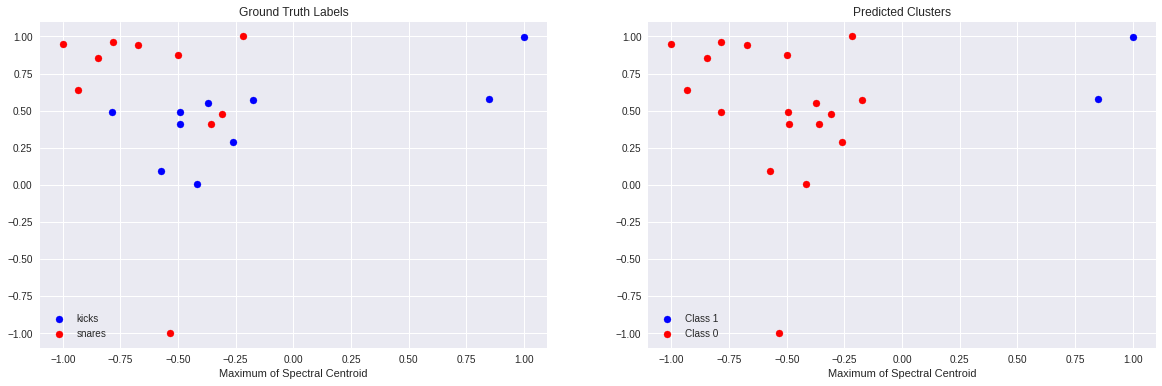

In [ ]:
def extract_features ( signal ):
  return [
          np.std(librosa.feature.zero_crossing_rate(signal)[0,:]),
          np.max(librosa.feature.spectral_centroid(signal)[0,:]),
  ]

kick_features = np.array([extract_features(x) for x in kick_signals])
snare_features = np.array([extract_features(x) for x in snare_signals])

feature_table = np.vstack((kick_features, snare_features))
training_features = scaler.fit_transform(feature_table)

model = sklearn.cluster.KMeans(n_clusters=2)
labels = model.fit_predict(training_features)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(training_features[labels_gt==1,0], training_features[labels_gt==1,1], c='b')
plt.scatter(training_features[labels_gt==0,0], training_features[labels_gt==0,1], c='r')
plt.title('Ground Truth Labels')
plt.xlabel('Mean of Zero Crossing Rate');
plt.xlabel('Maximum of Spectral Centroid');
plt.legend(('kicks', 'snares'));

plt.subplot(1,2,2)
plt.scatter(training_features[labels==1,0], training_features[labels==1,1], c='b')
plt.scatter(training_features[labels==0,0], training_features[labels==0,1], c='r')
plt.title('Predicted Clusters')
plt.xlabel('Mean of Zero Crossing Rate');
plt.xlabel('Maximum of Spectral Centroid');
plt.legend(('Class 1', 'Class 0'));



In [ ]:
labels = model.fit_predict(training_features)

acc = accuracy_score(labels_gt, labels)
print(acc)

#to make it match
if 1-acc > acc:
  acc = 1 - acc
  labels = 1 - labels
print('Accuracy:', acc)

0.6
Accuracy: 0.6


In [ ]:
for input, prediction, labelt in zip(files_table, labels, labels_gt):
  if prediction != labelt:
    print(input, 'has been classified as', class_names[int(prediction)], 'and should be', class_names[int(labelt)])

audio/drum_samples/train/kick_05.mp3 has been classified as Snare and should be Kicks
audio/drum_samples/train/kick_02.mp3 has been classified as Snare and should be Kicks
audio/drum_samples/train/kick_09.mp3 has been classified as Snare and should be Kicks
audio/drum_samples/train/kick_08.mp3 has been classified as Snare and should be Kicks
audio/drum_samples/train/kick_01.mp3 has been classified as Snare and should be Kicks
audio/drum_samples/train/kick_10.mp3 has been classified as Snare and should be Kicks
audio/drum_samples/train/kick_07.mp3 has been classified as Snare and should be Kicks
audio/drum_samples/train/kick_04.mp3 has been classified as Snare and should be Kicks


# **Gaussian Mixture Models**

In [ ]:
X_train = Y
ncomp = 2
covar_type = 'tied'
max_iter = 100

import sklearn.mixture
model = sklearn.mixture.GaussianMixture(n_components = ncomp, n_init = 15, covariance_type = covar_type, max_iter = max_iter)

In [ ]:
from matplotlib.patches import Ellipse 

def draw_ellipses(ax, means, covar, colors):
  ncomp = len(means)

  for i in range(ncomp):
    if covar[i].shape == (): # spherical covariances
      covmat = covar[i]*np.eye(ncomp)
    elif covar[i].shape == (ncomp,):
      covmat = np.diag(covar[i])
    else:
      covmat = covar[i]
   
    eigvals, eigvecs = np.linalg.eig(covmat)
    slope = eigvecs[1][0]/eigvecs[1][1]
    angle = 180.0 * np.arctan(slope) / np.pi
    eigvals *= 9
    ell = Ellipse(means[i], eigvals[0], eigvals[1], angle = angle, fill = True, color = colors[i], linewidth = 1, zorder=0)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)

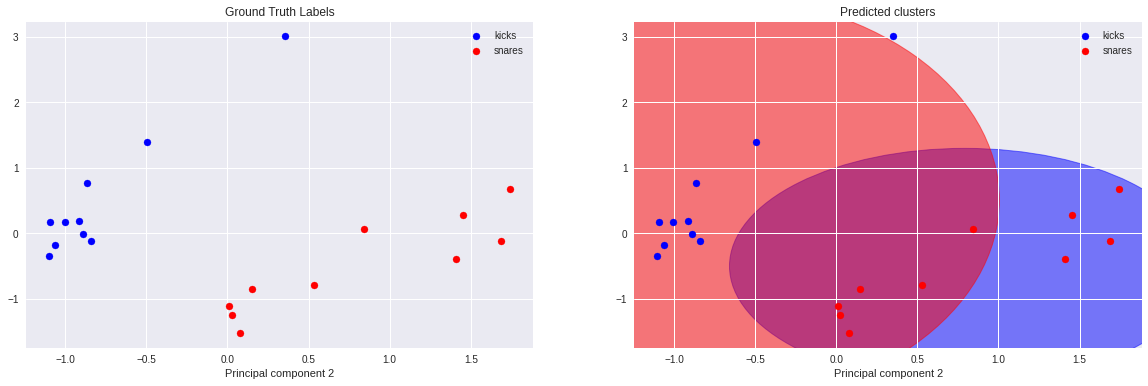

In [ ]:
model = model.fit(X_train)
labels = model.predict(X_train)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(X_train[labels_gt==1,0], X_train[labels_gt==1,1], c='b')
plt.scatter(X_train[labels_gt==0,0], X_train[labels_gt==0,1], c='r')
plt.title('Ground Truth Labels')
plt.xlabel('Principal component 1');
plt.xlabel('Principal component 2');
plt.legend(('kicks', 'snares'));

plt.subplot(1,2,2)
plt.scatter(X_train[labels==1,0], X_train[labels==1,1], c='b')
plt.scatter(X_train[labels==0,0], X_train[labels==0,1], c='r')
plt.title('Predicted clusters')
plt.xlabel('Principal component 1');
plt.xlabel('Principal component 2');
plt.legend(('kicks', 'snares'));

draw_ellipses(plt.gca(), model.means_, model.covariances_, ['b', 'r'])